# DACON 고객 대출등급 분류 해커톤

---

# import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data set

`-` read data

In [2]:
df = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\data\\dacon\\open\\train.csv')

`-` 결측치 확인

In [3]:
df.isnull().sum(axis=0)

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

- 결측치는 확인되지 않음

`-` summary

In [4]:
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


`-` data 변수 파악

- 이산형 변수
    - ID, 대출기간, 주택소유상태, 대출목적, 대출등급, 근로기간
- 연속형 변수
    - 대출금액, 연간소득, 부채대비 소득비율, 총계좌수,최근 2년간 연체횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수
    
**ID 변수는 유의한 지표가 아니므로 제외**

# 이산형변수 data EDA

- 이산형변수

In [5]:
discrete = ['대출기간','주택소유상태','대출목적','대출등급', '근로기간']

df_discrete =df.loc[:,discrete]

`-` 변수 종류 파악

In [6]:
set_discrete = [set(df_discrete.iloc[:,i]) for i in range(len(discrete))]
set_discrete = [list(set_discrete[i]) for i in range(len(discrete))]
set_discrete

[[' 60 months', ' 36 months'],
 ['RENT', 'OWN', 'MORTGAGE', 'ANY'],
 ['기타',
  '주택',
  '휴가',
  '이사',
  '신용 카드',
  '자동차',
  '소규모 사업',
  '부채 통합',
  '주택 개선',
  '재생 에너지',
  '의료',
  '주요 구매'],
 ['F', 'A', 'G', 'D', 'E', 'C', 'B'],
 ['< 1 year',
  '6 years',
  '8 years',
  '1 year',
  '3 years',
  'Unknown',
  '<1 year',
  '10+years',
  '3',
  '10+ years',
  '4 years',
  '2 years',
  '7 years',
  '1 years',
  '5 years',
  '9 years']]

# `-` 각 변수 bar 그래프

In [7]:
lst = []
for j in range(len(df_discrete.columns)):
    a= [df_discrete.iloc[:,j] == set_discrete[j][i] for i in range(len(set_discrete[j]))]
    lst.append(a)

In [8]:
lst2 =[]
for j in range(len(df_discrete.columns)):
    b=[(lst[j][i]*1).sum() for i in range(len(lst[j]))]
    lst2.append(b)
    

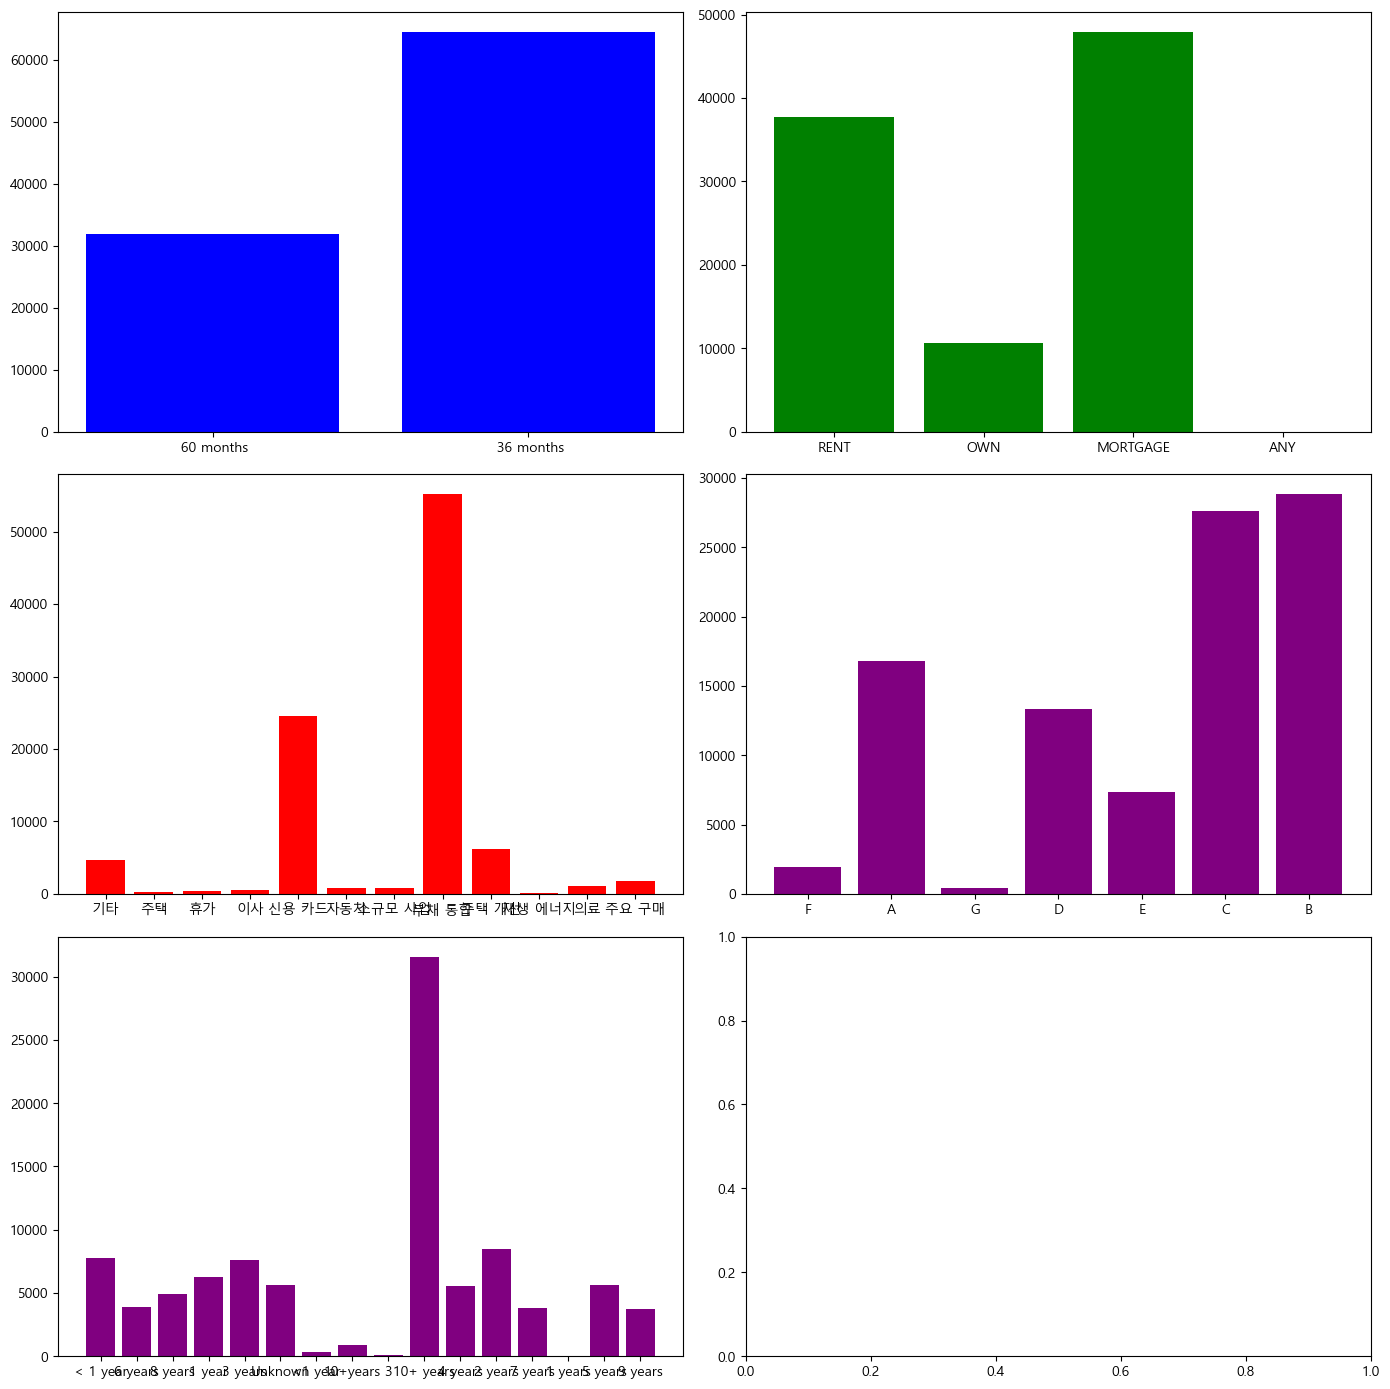

In [9]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# 각각의 축에 막대 그래프 추가
axes[0, 0].bar(set_discrete[0], lst2[0], color='blue')
axes[0, 1].bar(set_discrete[1],lst2[1], color='green')
axes[1, 0].bar(set_discrete[2],lst2[2], color='red')
axes[1, 1].bar(set_discrete[3],lst2[3], color='purple')
axes[2, 0].bar(set_discrete[4],lst2[4], color='purple')
# 레이아웃 조정
plt.tight_layout()
plt.show()

# `-` 원그래프, count

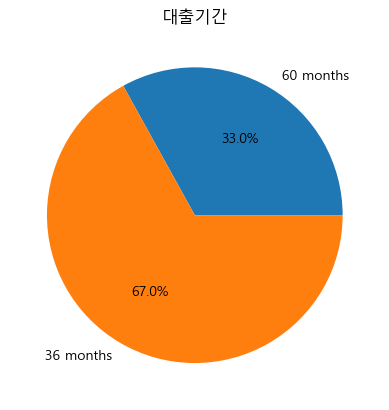

In [10]:
plt.pie(lst2[0],labels=set_discrete[0],autopct='%.1f%%');
plt.title('대출기간')
plt.show()

In [11]:
discreie_count= [pd.DataFrame({discrete[i]:lst2[i]},set_discrete[i]) for i in range(len(discrete))]
discreie_count[0]

,대출기간
60 months,31815
36 months,64479


`-` 대출기간
- 대출기간은 60개월과 36개월로 이루어져 있음
- 60개월보다 36개월 대출기간 고객이 2배가량 많다

---

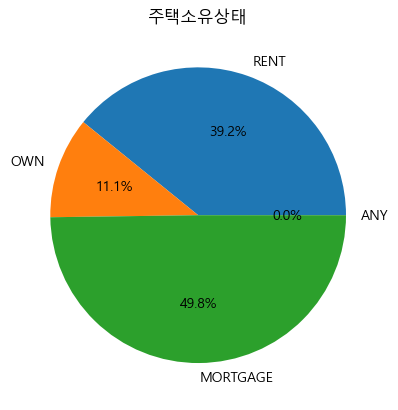

In [12]:
plt.pie(lst2[1],labels=set_discrete[1],autopct='%.1f%%');
plt.title('주택소유상태')
plt.show()

In [13]:
discreie_count[1]

,주택소유상태
RENT,37705
OWN,10654
MORTGAGE,47934
ANY,1


`-` 주택소유상태
- MORTGAGE(저당)으로 인한 주택소유가 가장 많으면 약 50%의 pie를 차지함
- RENT(전세)로 인한 주택소유는 약 40%로 2순위를 차지함
- OWN(자가보유)는 약 11%이다

---

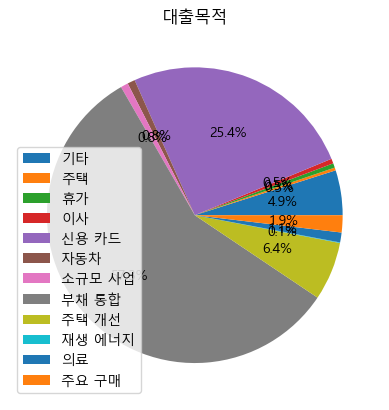

In [14]:
plt.pie(lst2[2],autopct='%.1f%%');
plt.title('대출목적')
plt.legend(set_discrete[2])
plt.show()

In [15]:
discreie_count[2].sort_values('대출목적',ascending=False)

,대출목적
부채 통합,55150
신용 카드,24500
주택 개선,6160
기타,4725
주요 구매,1803
의료,1039
자동차,797
소규모 사업,787
이사,506
휴가,466


`-` 대출목적
- 부채통합이 압도적으로 많은 경우를 차지함
- 신용 카드를 이용한 대출 거래가 그 뒤를 차지한다
- 나머지 목적의 총 pie가 대략 18%를 차지함

---

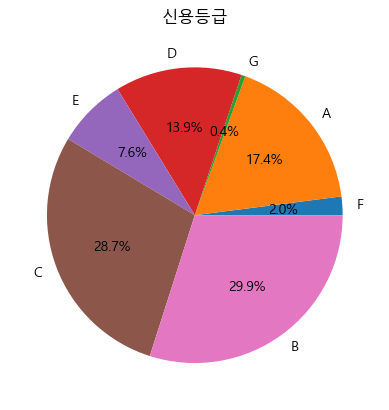

In [16]:
plt.pie(lst2[3],labels=set_discrete[3],autopct='%.1f%%');
plt.title('신용등급')
plt.show()

In [17]:
discreie_count[3].sort_values('대출등급',ascending=False)

,대출등급
B,28817
C,27623
A,16772
D,13354
E,7354
F,1954
G,420


`-` 대출등급
- B등급과 C등급이 근소한 차이로 1,2순위를 차지함
- A,C,B 등급이 전체의 2/3를 넘게 차지한다

---

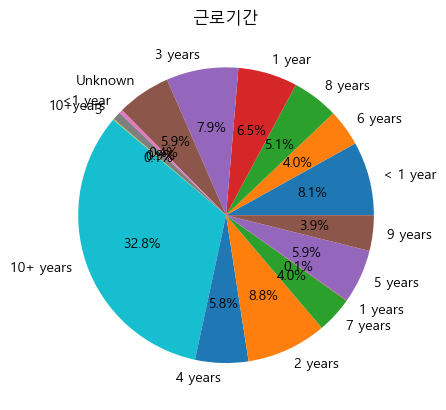

In [18]:
plt.pie(lst2[4],labels=set_discrete[4],autopct='%.1f%%');
plt.title('근로기간')
plt.show()

In [19]:
discreie_count[4].sort_values('근로기간',ascending=False)

,근로기간
10+ years,31585
2 years,8450
< 1 year,7774
3 years,7581
1 year,6249
Unknown,5671
5 years,5665
4 years,5588
8 years,4888
6 years,3874


`-` 근로기간
- 10년이상 장기 근로자의 비율이 매우 높다.
- 그 오히려 2년 근로자가 많음
- 근로 기간에 따라 비례하는 것은 아닌 것을 알 수 있다

---

# 데이터 가변수 설정

In [20]:
discrete.remove('대출등급')
df_discrete.iloc[:,[0,1,2,4]].head() # y label remove

,대출기간,주택소유상태,대출목적,근로기간
0,36 months,RENT,부채 통합,6 years
1,60 months,MORTGAGE,주택 개선,10+ years
2,36 months,MORTGAGE,부채 통합,5 years
3,36 months,MORTGAGE,부채 통합,8 years
4,60 months,RENT,주요 구매,Unknown


In [21]:

df_dummy= [pd.get_dummies(df_discrete[discrete[i]]) for i in range(len(discrete))]

df_dummy = pd.concat([df_dummy[i] for i in range(len(df_dummy))],axis=1)

df_dummy = pd.concat([df_dummy,df_discrete.iloc[:,[3]]],axis=1)
df_dummy.head()

,36 months,60 months,ANY,MORTGAGE,OWN,RENT,기타,부채 통합,소규모 사업,신용 카드,...,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,<1 year,Unknown,대출등급
0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,C
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,A
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,C
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,B


---

# 대출기간에 따른 이산형 변수의 분포

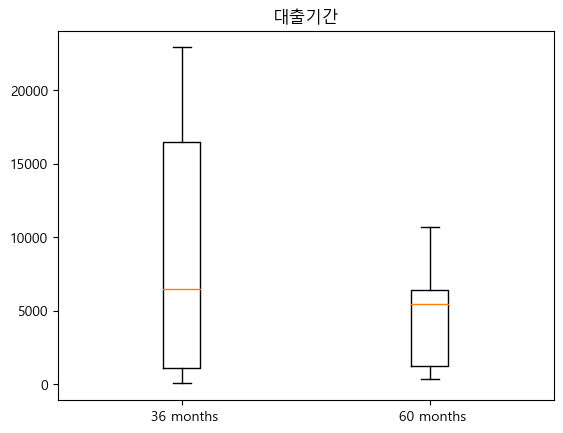

In [23]:
plt.boxplot(x=df_dummy.groupby('대출등급').sum().iloc[:,0:2]);
plt.title('대출기간')
plt.xticks(range(1,len(set_discrete[0])+1),df_dummy.groupby('대출등급').sum().iloc[:,0:2].columns.values)
plt.show()

In [30]:
df_dummy.groupby('대출등급').sum().iloc[:,0:2]

,36 months,60 months
대출등급,,
A,15952,820
B,22883,5934
C,16935,10688
D,6485,6869
E,1895,5459
F,270,1684
G,59,361


- 비교적 단기인 36개월 대출 고객의 등급이 60개월 대출 고객의 등급보다 높게 이루어져 있음

---

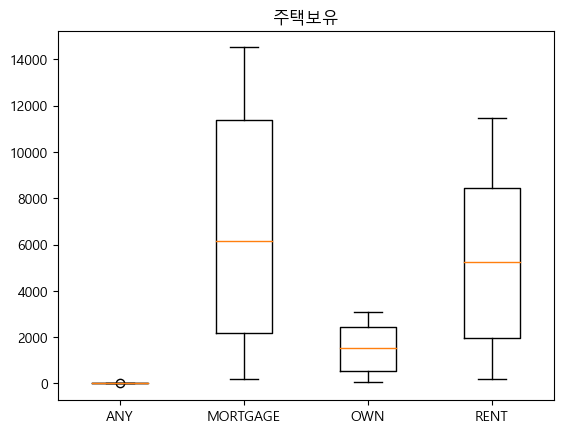

In [24]:

plt.boxplot(x=df_dummy.groupby('대출등급').sum().iloc[:,2:6]);
plt.title('주택보유')
plt.xticks(range(1,len(set_discrete[1])+1),df_dummy.groupby('대출등급').sum().iloc[:,2:6].columns.values)
plt.show()

In [25]:
df_dummy.groupby('대출등급').sum().iloc[:,2:6]

,ANY,MORTGAGE,OWN,RENT
대출등급,,,,
A,0,9640,1864,5268
B,0,14518,3099,11200
C,1,13106,3038,11478
D,0,6163,1538,5653
E,0,3452,846,3056
F,0,883,216,855
G,0,172,53,195


- 저당, 자가보유, 전세 전부 B,C 등급에 많이 포진되어있다.


---

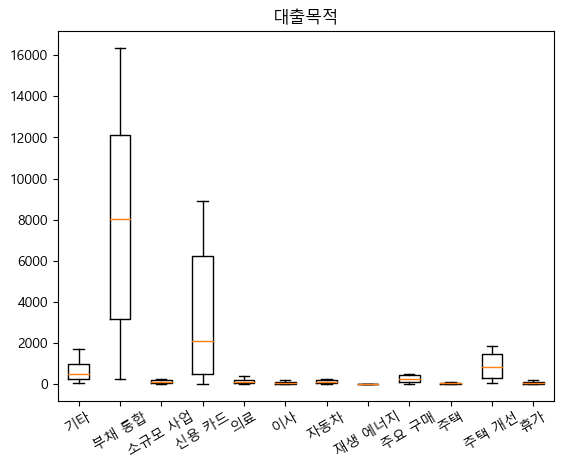

In [26]:
plt.boxplot(x=df_dummy.groupby('대출등급').sum().iloc[:,6:18]);
plt.title('대출목적')
plt.xticks(range(1,len(set_discrete[2])+1),df_dummy.groupby('대출등급').sum().iloc[:,6:18].columns.values, rotation=30)
plt.show()

In [27]:
df_dummy.groupby('대출등급').sum().iloc[:,6:18]

,기타,부채 통합,소규모 사업,신용 카드,의료,이사,자동차,재생 에너지,주요 구매,주택,주택 개선,휴가
대출등급,,,,,,,,,,,,
A,356,8036,19,6424,104,13,174,1,372,8,1225,40
B,1080,15680,75,8917,238,86,258,4,479,36,1845,119
C,1705,16349,249,6036,375,203,213,20,503,85,1689,196
D,916,8529,192,2092,197,131,87,21,238,68,805,78
E,478,4979,158,877,91,50,46,10,150,63,425,27
F,147,1311,64,137,27,18,15,4,53,29,145,4
G,43,266,30,17,7,5,4,0,8,12,26,2


---

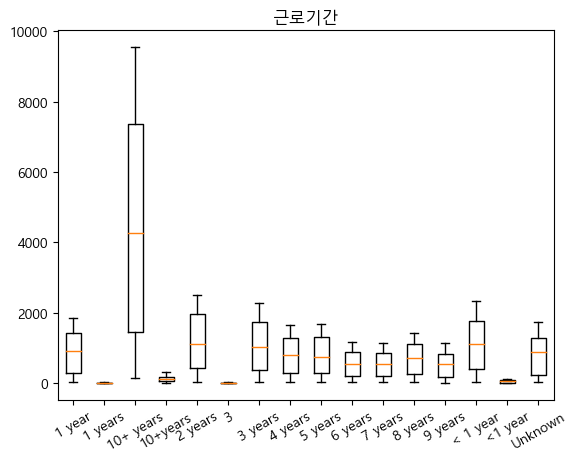

In [28]:
df_dummy.groupby('대출등급').sum().iloc[:,18:36]
plt.boxplot(x=df_dummy.groupby('대출등급').sum().iloc[:,18:36]);
plt.title('근로기간')
plt.xticks(range(1,len(set_discrete[4])+1),df_dummy.groupby('대출등급').sum().iloc[:,18:36].columns.values, rotation=30)
plt.show()

In [29]:
df_dummy.groupby('대출등급').sum().iloc[:,18:36]

,1 year,1 years,10+ years,10+years,2 years,3,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,<1 year,Unknown
대출등급,,,,,,,,,,,,,,,,
A,1025,6,5872,137,1454,20,1295,969,986,650,619,867,621,1262,55,934
B,1845,22,9554,311,2493,32,2270,1659,1679,1157,1138,1417,1137,2261,100,1742
C,1845,15,8882,223,2495,16,2209,1577,1646,1124,1103,1364,1049,2326,121,1628
D,919,8,4262,123,1107,13,1015,796,736,543,535,707,545,1115,58,872
E,478,3,2254,77,695,4,604,440,475,296,318,385,289,629,29,378
F,109,1,627,22,170,4,149,122,119,85,79,128,85,156,6,92
G,28,1,134,3,36,0,39,25,24,19,22,20,18,25,1,25


---

# 연속형 변수

`-` Continuous data

In [92]:
continuous = df.columns.values.tolist()
[continuous.remove(discrete[i]) for i in range(len(discrete))]
continuous

['ID',
 '대출금액',
 '연간소득',
 '부채_대비_소득_비율',
 '총계좌수',
 '최근_2년간_연체_횟수',
 '총상환원금',
 '총상환이자',
 '총연체금액',
 '연체계좌수',
 '대출등급']

In [106]:
df_continuous= df[continuous].iloc[:,1:-1]
df_continuous.head()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0
1,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0
2,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0
3,14400000,132000000,15.09,15,0,325824,153108.0,0.0,0.0
4,18000000,71736000,25.39,19,0,228540,148956.0,0.0,0.0


In [123]:
df.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


- 부채대비소득비율, 총계좌수, 최근 2년간 연체횟수, 총연체금액은 값이 비이상적으로 큰 경우가 있음
- 최근 2년간 연체횟수와 총연체금액, 연체계좌수는 대출등급에 중요한 지표로 보여진다

# 히스토그램

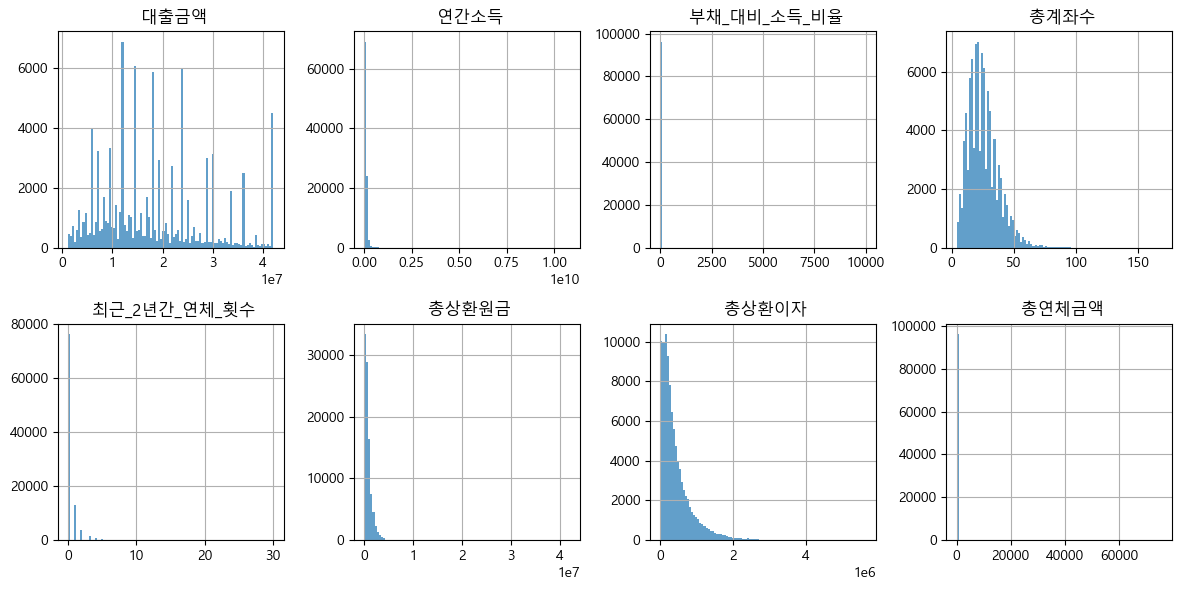

In [119]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for (col, ax) in zip(df_continuous.columns, axes.flatten()):
    df_continuous[col].hist(ax=ax, bins=100, alpha=0.7)
    ax.set_title(f' {col}')

plt.tight_layout()
plt.show()

- 대출금액, 총계좌수, 총상환이자가 어느정도 분포를 형성하고 있음
- 연간소득, 부채 대비 소득비율, 총산환원금, 총연체금액은 극단적인 분포를 형성하고 있음 이상치가 존재하는 것인데 이상치가 고객분류에 중요한 지표가 될 수 있어보인다
- 최근2년간 연체횟수는 이산형으로 판단할 여지가 있다.
- 히스토그램만으로는 분포를 체크하기 어려움

# 박스플랏

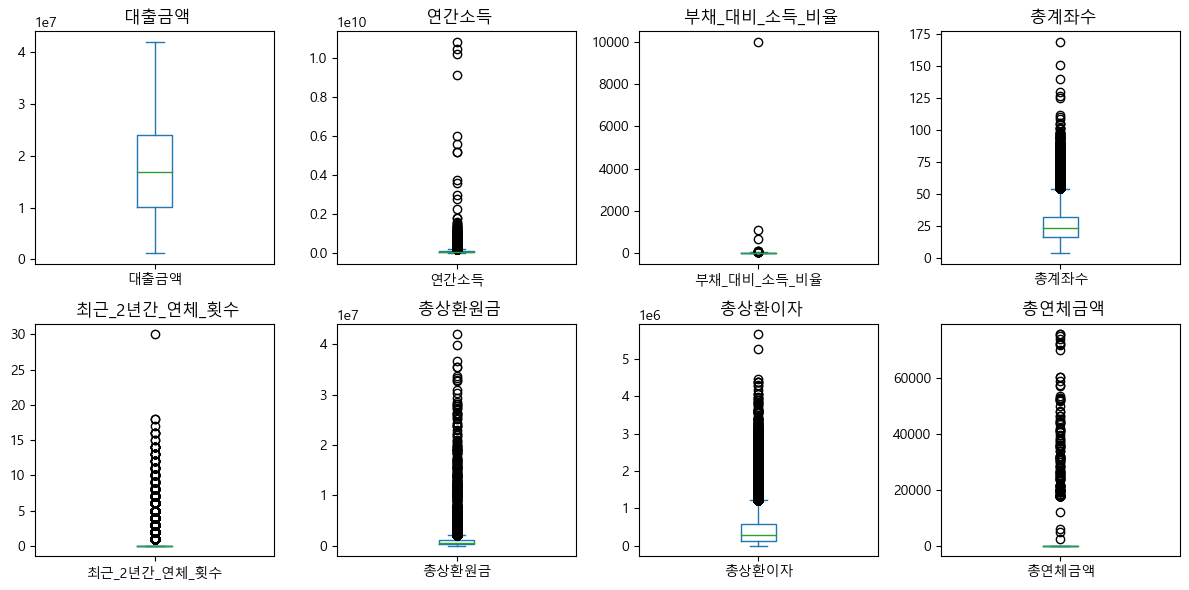

In [128]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for (col, ax) in zip(df_continuous.columns, axes.flatten()):
    df_continuous[col].plot(kind='box', ax=ax)
    ax.set_title(f' {col}')

plt.tight_layout()
plt.show()

- 대출등급을 제외한 나머지 변수의 분포는 이상치가 상당히 있는 것을 발견함

`-` 가정
- 박스플랏에 존재하는 이상치들이 고객분류 등급에 중요한 영향을 미칠 것이다
- 따라서 일단 이상치를 제거하지 않도록하겠음

# 등급에 따른 연속형 변수의 평균

In [144]:
pd.options.display.float_format = '{:.5f}'.format
df[continuous].iloc[:,1:].groupby('대출등급').mean()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
대출등급,,,,,,,,,
A,17905794.77701,112491115.17625,16.54785,26.91068,0.21870,1066966.31147,224008.46101,14.80611,0.00113
B,16868082.72894,95706399.97932,18.12953,25.22338,0.36541,834014.43648,303340.96082,29.44137,0.00479
C,17890044.89013,89038039.57195,20.27009,24.69507,0.38030,752107.76353,430674.46201,48.05256,0.00789
D,19533313.61390,83596728.50502,21.80846,24.70511,0.38438,729717.33922,611789.58215,113.35210,0.00846
E,22320130.54120,84928644.43242,22.24847,25.32064,0.34933,707450.74789,814697.46968,94.57221,0.00761
F,24005174.00205,84345056.54248,21.85371,25.54350,0.36182,667317.71546,1095274.02252,237.80143,0.00665
G,24020785.71429,82580340.45714,20.69195,24.55000,0.41667,587019.02857,1284655.05714,329.94286,0.00476


- 낮은등급으로 갈수록 대출금액은 증가하는 것으로 보인다.
- 높은 등급일수록 연간소득은 높으며, 낮은 등급일수록 연간소득이 다소 작아진 것을 확인
- A,B 등급의 부채_대비_소득_비율이 다른 등급에 비해 유의하게 작은 것을 확인
- 계좌수는 등급에 따라 큰 영향이 없어보인다.
- 최근_2년간 연체 횟수는 A등급이 가장 큰차이로 우수하며, G등급이 가장 높다 그 중간 등급은 서로간 유의한 차이로 보이지 못해보임
- 총상환원금은 등급이 높을수록 커진다. 중요한 지표로 보인다.
- 총 상환해야할 이자는 낮은 등급일수록 매우 커지는 것을 확인 중요한 지표로 보인다.
- 총 연체금액은 높은 등급일 수록 작으며, 낮은 등급일수록 매우 커짐
- 연체계좌수는 A 등급이 매우 유의하게 가장 적으며 이외에 다른 등급에서는 등급에 따라 차이를 보이기 어렵다고 보임

즉 등급이 높은 A는 긍정적인 변수에 모두 우의를 점하고 있고 부정적인 연체와 관련된 변수에는 모두 하위권을 차지 하고 있다

---

# train/ validation data 처리 및 변환

`-` X feature

In [157]:
data = pd.concat([df_dummy.iloc[:,:-1],df_continuous],axis=1)
data.head()

,36 months,60 months,ANY,MORTGAGE,OWN,RENT,기타,부채 통합,소규모 사업,신용 카드,...,Unknown,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,1,0,0,0,0,1,0,1,0,0,...,0,12480000,72000000,18.90000,15,0,0,0.00000,0.00000,0.00000
1,0,1,0,1,0,0,0,0,0,0,...,0,14400000,130800000,22.33000,21,0,373572,234060.00000,0.00000,0.00000
2,1,0,0,1,0,0,0,1,0,0,...,0,12000000,96000000,8.60000,14,0,928644,151944.00000,0.00000,0.00000
3,1,0,0,1,0,0,0,1,0,0,...,0,14400000,132000000,15.09000,15,0,325824,153108.00000,0.00000,0.00000
4,0,1,0,0,0,1,0,0,0,0,...,1,18000000,71736000,25.39000,19,0,228540,148956.00000,0.00000,0.00000


`-` minmax scaler

In [182]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_minmax= minmax.fit_transform(data)

`-` y

In [164]:
y = df_dummy.iloc[:,-1]
y.head()

0    C
1    B
2    A
3    C
4    B
Name: 대출등급, dtype: object

`-` labelencoder

In [177]:
from sklearn.preprocessing import LabelEncoder
y_encoder= LabelEncoder()
y_label = y_encoder.fit_transform(y)

`-` train/test set

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_minmax,y_label)

---

# test data 처리/ 변환

In [195]:
df_ = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\data\\dacon\\open\\test.csv')

In [198]:
df_= df_.drop(['ID'],axis=1)

`-` 이산형 변수 가변수 data

In [204]:
df_.loc[:,discrete].head()

,대출기간,주택소유상태,대출목적,근로기간
0,36 months,MORTGAGE,주택 개선,8 years
1,36 months,RENT,부채 통합,5 years
2,36 months,RENT,신용 카드,6 years
3,36 months,MORTGAGE,신용 카드,5 years
4,36 months,RENT,신용 카드,5 years


In [206]:

df_dummy2= [pd.get_dummies(df_[discrete[i]]) for i in range(len(discrete))]

df_dummy2 = pd.concat([df_dummy2[i] for i in range(len(df_dummy2))],axis=1)

#df_dummy2 = pd.concat([df_dummy2,df_discrete.iloc[:,[3]]],axis=1)
df_dummy2.head()

,36 months,60 months,MORTGAGE,OWN,RENT,결혼,기타,부채 통합,소규모 사업,신용 카드,...,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,<1 year,Unknown
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


`-` 연속형 변수

In [225]:
df_[continuous[1:-1]].iloc[:,0:].head()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,16800000,132000000,19.64000,12,0,394692,146604.00000,0.00000,0.00000
1,8400000,89971200,15.84000,25,0,0,0.00000,0.00000,0.00000
2,17280000,150000000,8.41000,20,0,1786980,281820.00000,0.00000,0.00000
3,14400000,66000000,13.72000,30,1,669024,281724.00000,0.00000,0.00000
4,27600000,55200000,30.50000,12,0,1250052,614844.00000,0.00000,0.00000


In [231]:
df_test = pd.concat([df_dummy2,df_[continuous[1:-1]].iloc[:, 0:]],axis=1)
df_test.columns

Index([' 36 months', ' 60 months', 'MORTGAGE', 'OWN', 'RENT', '결혼', '기타',
       '부채 통합', '소규모 사업', '신용 카드', '의료', '이사', '자동차', '재생 에너지', '주요 구매', '주택',
       '주택 개선', '휴가', '1 year', '1 years', '10+ years', '10+years', '2 years',
       '3', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years',
       '9 years', '< 1 year', '<1 year', 'Unknown', '대출금액', '연간소득',
       '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액',
       '연체계좌수'],
      dtype='object')

In [228]:
data.columns

Index([' 36 months', ' 60 months', 'ANY', 'MORTGAGE', 'OWN', 'RENT', '기타',
       '부채 통합', '소규모 사업', '신용 카드', '의료', '이사', '자동차', '재생 에너지', '주요 구매', '주택',
       '주택 개선', '휴가', '1 year', '1 years', '10+ years', '10+years', '2 years',
       '3', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years',
       '9 years', '< 1 year', '<1 year', 'Unknown', '대출금액', '연간소득',
       '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액',
       '연체계좌수'],
      dtype='object')

In [232]:
test_scale = minmax.fit_transform(df_test)

---

# basemodel Ramdomforest

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [189]:
RF= RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

`-` validation

In [192]:
pred = RF.predict(X_test)
accuracy_score(y_test, pred)

0.7169560521724683

`-` test

In [237]:
preds= RF.predict(test_scale)

In [242]:
preds= y_encoder.inverse_transform(preds)

`-` submit

In [243]:
submit = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\data\\dacon\\open\\sample_submission.csv')

In [244]:
submit['대출등급'] = preds

In [245]:
submit.to_csv('./baseline_submission.csv', index=False)

---